## The table with the data related to the Covid-19 Vaccination campaign in Spain by autonomy. (with pandas)

In [ ]:
# Web scraping Covid table with Pandas
import pandas as pd
import requests

URL = 'https://es.wikipedia.org/wiki/Vacunaci%C3%B3n_contra_la_COVID-19_en_Espa%C3%B1a'
r = requests.get(URL)

tables=pd.read_html(r.text)
df_spain= tables[7]
df_spain = pd.DataFrame(df_spain)
df_spain

In [ ]:
#Cleaning df_espana to be able to make calculations/graph

df_spain.columns= ['Autonomia', 'Dosis_pfizer', 'Dosis_Moderna', 'Dosis_AstrZ',
                   'Dosis_Janssen', 'Dosis_tot',
                    'Dosis_admin_tot', 'Dosis_admin_per', 'Poblacion', 
                   'Personas_compl_tot', 'Personas_compl_per']

import numpy as np
for col in df_spain.columns[1:]:
  df_spain[col]=df_spain[col].apply(lambda x: str(x).replace('\xa0','') )
  df_spain[col]=df_spain[col].apply(lambda x: np.char.replace(x,',','.') )
  df_spain[col]=df_spain[col].apply(lambda x: np.char.replace(x,' ','') )
  df_spain[col]=df_spain[col].apply(lambda x: np.char.replace(x,'%','') )
  df_spain[col]=df_spain[col].astype(float)
  
df_spain

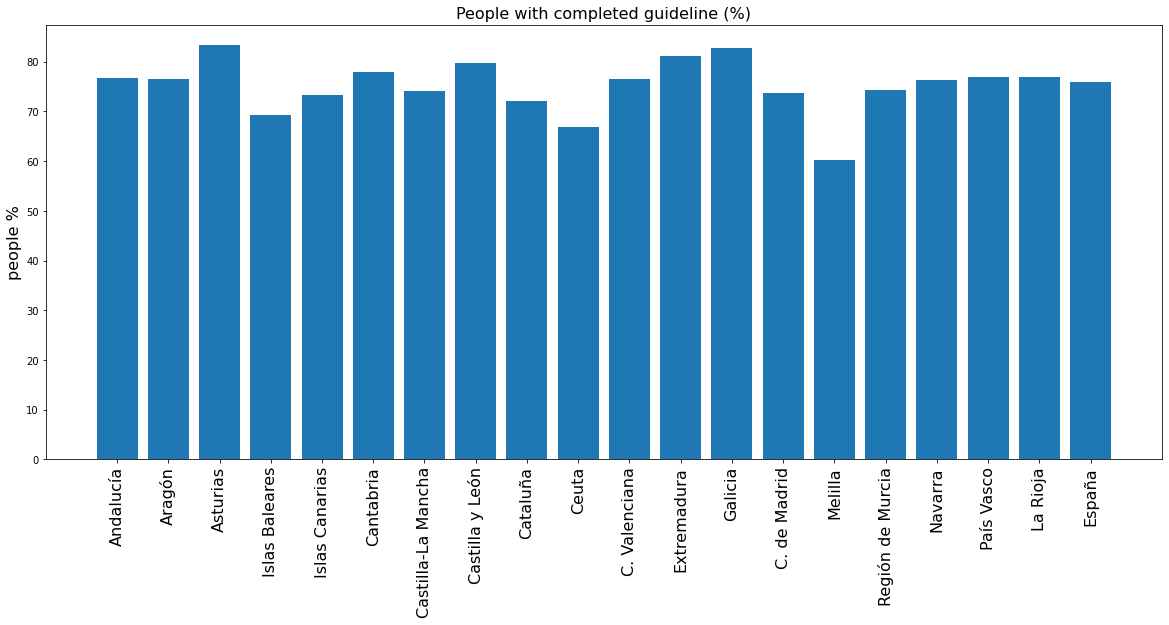

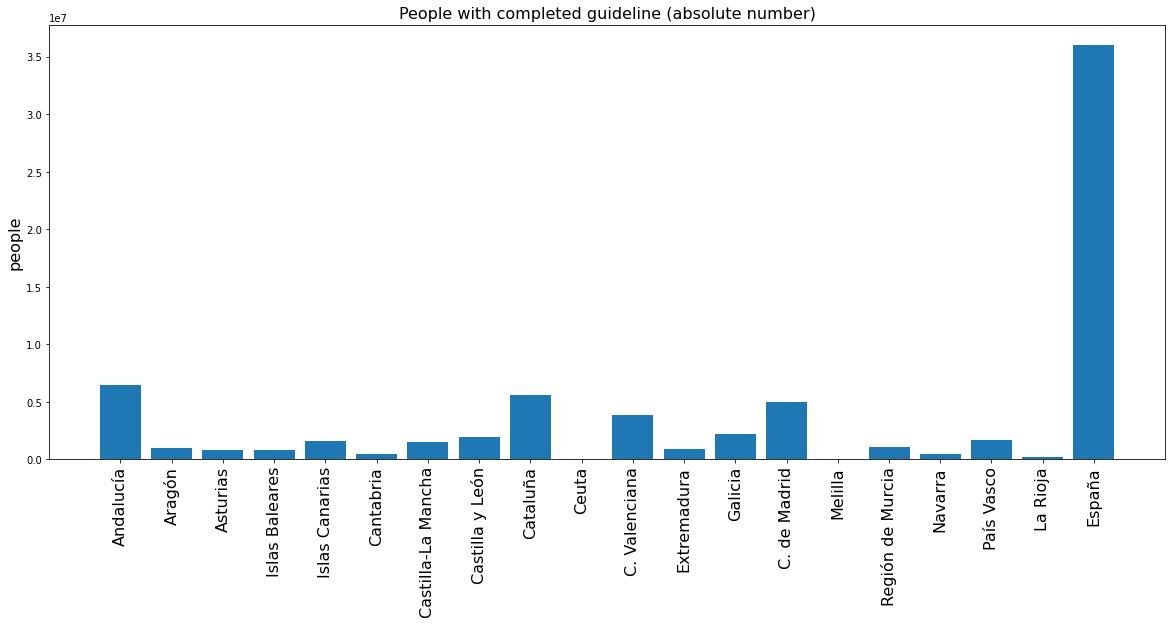

In [4]:
# Bar chart representation
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.title('People with completed guideline (%)', fontsize=16)
plt.bar(df_spain.index.values, df_spain['Personas_compl_per'].values)
plt.xticks(df_spain.index.values, 
           df_spain['Autonomia'].values, rotation=90,fontsize=16)
plt.ylabel('people %',fontsize=16)
plt.show()

plt.figure(figsize=(20,8))
plt.title('People with completed guideline (absolute number)', fontsize=16)
plt.bar(df_spain.index.values, df_spain['Personas_compl_tot'].values)
plt.xticks(df_spain.index.values, 
           df_spain['Autonomia'].values, rotation=90,fontsize=16)
plt.ylabel('people',fontsize=16)
plt.show()

- Which autonomy has vaccinated more people? 
- What autonomy has a smaller percentage of its population vaccinated?

In [5]:
df_spain_= df_spain[0:19]  # delete las row (Spain)
print('The autonomy that has vaccinated more people has been: ',
      df_spain_[df_spain_['Personas_compl_tot'] ==
                df_spain_[df_spain_['Autonomia'] !=
                          'Total']['Personas_compl_tot'].max()]
      ['Autonomia'].values[0])

print('\nThe autonomy that has vaccinated more people has been: ',
      df_spain_[df_spain_['Personas_compl_per'] ==
                df_spain_[df_spain_['Autonomia'] !=
                          'Total']['Personas_compl_per'].min()]
      ['Autonomia'].values[0])


The autonomy that has vaccinated more people has been:  Andalucía

The autonomy that has vaccinated more people has been:  Melilla


## The table with the data related to the global vaccination rate of the Covid-19 campaign. That is, the table referenced as "Vaccination campaigns in the world" in the url provided below (with BeautifulSoup)

In [6]:
# load libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd


URL= 'https://es.wikipedia.org/wiki/Vacuna_contra_la_COVID-19'
r = requests.get(URL)
r.status_code


# get the HTML content from the webpage
html = r.content

# Create the soup
soup = BeautifulSoup(html, 'lxml')


# Get table
table= soup.find_all("table", attrs={"class":"wikitable sortable"})
table_=table[0]

# Scraping the table from the soap object
df_world = pd.DataFrame()

# Being 5 tables, we iterate to concatenate them into a single global table
for i, tt in enumerate(table):
  if i > 0: # En is the first of the scraped tables
    target_table = tt
    # get the rows
    trs=target_table.find("tbody").find_all('tr')

    # Get cells by row
    tds= [tr.find_all('td') for tr in trs]

    # Create list with the value of the rows
    target_table_ok = []
    for i in range( 3, len(tds) ):
        target_table_ok.append([tt.text.strip('\n') for tt in tds[i]])

    df_aux=pd.DataFrame(target_table_ok, 
                        columns=[
                            '#','Country','Population %','Continent',
                            'Vaccinated population','ref','Vaccines'
                            ])
    
    df_world = df_world.append(df_aux)

df_world = df_world.drop(columns=['Continent'])
df_world

,#,Country,Population %,Vaccinated population,ref,Vaccines
0,1,Gibraltar,100%,41 099,.gb,Janssen Moderna Oxford-AstraZeneca Pfizer/BioN...
1,2,EAU,98.2%,9 890 441,.ae,Sinopharm Oxford-AstraZeneca Pfizer/BioNTech
2,3,Cuba,97.8%,10 569 265,.cu,Soberana 02 Abdala
3,4,Portugal,93.7%,9 573 488,.pt,Pfizer/BioNTech
4,5,Brunéi Brunéi,92.7%,406 768,.cn,"CBG, Sinopharm Sinovac"
...,...,...,...,...,...,...
11,186,Chad,2.8%,254 847,oms,Oxford-AstraZeneca
12,187,Haití Haití,2.1%,143 733,web,Oxford-AstraZeneca
13,188,Sudán del Sur,1.8%,325 688,web,Oxford-AstraZeneca
14,189,República Democrática del Congo República Demo...,1.2%,372 564,oms,Oxford-AstraZeneca


### Clean df_mundo to be able to operate

In [7]:
import numpy as np
for col in df_world.columns[2:-2]:
  df_world[col]=df_world[col].apply(lambda x: str(x).replace('\xa0','') )
  df_world[col]=df_world[col].apply(lambda x: np.char.replace(x,',','') )
  df_world[col]=df_world[col].apply(lambda x: np.char.replace(x,' ','') )
  df_world[col]=df_world[col].apply(lambda x: np.char.replace(x,'%','') )
  df_world[col]=df_world[col].astype(float)

df_world

,#,Country,Population %,Vaccinated population,ref,Vaccines
0,1,Gibraltar,100.0,41099.0,.gb,Janssen Moderna Oxford-AstraZeneca Pfizer/BioN...
1,2,EAU,98.2,9890441.0,.ae,Sinopharm Oxford-AstraZeneca Pfizer/BioNTech
2,3,Cuba,97.8,10569265.0,.cu,Soberana 02 Abdala
3,4,Portugal,93.7,9573488.0,.pt,Pfizer/BioNTech
4,5,Brunéi Brunéi,92.7,406768.0,.cn,"CBG, Sinopharm Sinovac"
...,...,...,...,...,...,...
11,186,Chad,2.8,254847.0,oms,Oxford-AstraZeneca
12,187,Haití Haití,2.1,143733.0,web,Oxford-AstraZeneca
13,188,Sudán del Sur,1.8,325688.0,web,Oxford-AstraZeneca
14,189,República Democrática del Congo República Demo...,1.2,372564.0,oms,Oxford-AstraZeneca


### Sort the dataframe by the absolute number of people vaccinated (i.e. by the vaccinated Population column).

In [9]:
df_world_sorted = df_world.sort_values(
    by='Vaccinated population', ascending=False
    ).reset_index(drop=True)
df_world_sorted.head(20)

,#,Country,Population %,Vaccinated population,ref,Vaccines
0,10,China,90.5,1.266070e+09,.cn,"CBG, Sinopharm Sinovac"
1,81,India,67.5,9.473412e+08,.in,Covaxina
2,45,Unión Europea,78.4,3.335514e+08,.eu,Oxford-AstraZeneca Pfizer/BioNTech
3,51,EE. UU.,77.2,2.503790e+08,.us,"Johnson&Johnson, Moderna, Pfizer/BioNTech"
4,27,Brasil,83.0,1.709118e+08,.br,Sinovac
5,130,Pakistán,41.5,1.114087e+08,.pk,"CanSino, Sinopharm Sinovac Sputnik V"
6,29,Japón,82.6,1.013620e+08,.jp,Pfizer/BioNTech
7,94,Bangladés,60.4,9.544032e+07,.bg,Covaxina
8,82,México,67.3,8.368311e+07,.mx,Sinovac Sputnik V Oxford-AstraZeneca Pfizer/Bi...
9,35,Vietnam,81.2,7.907886e+07,.vnm,Pfizer/BioNTech


### Represent in a bar chart the 20 countries that have vaccinated the most people. That is, each bar will represent the value of a country.

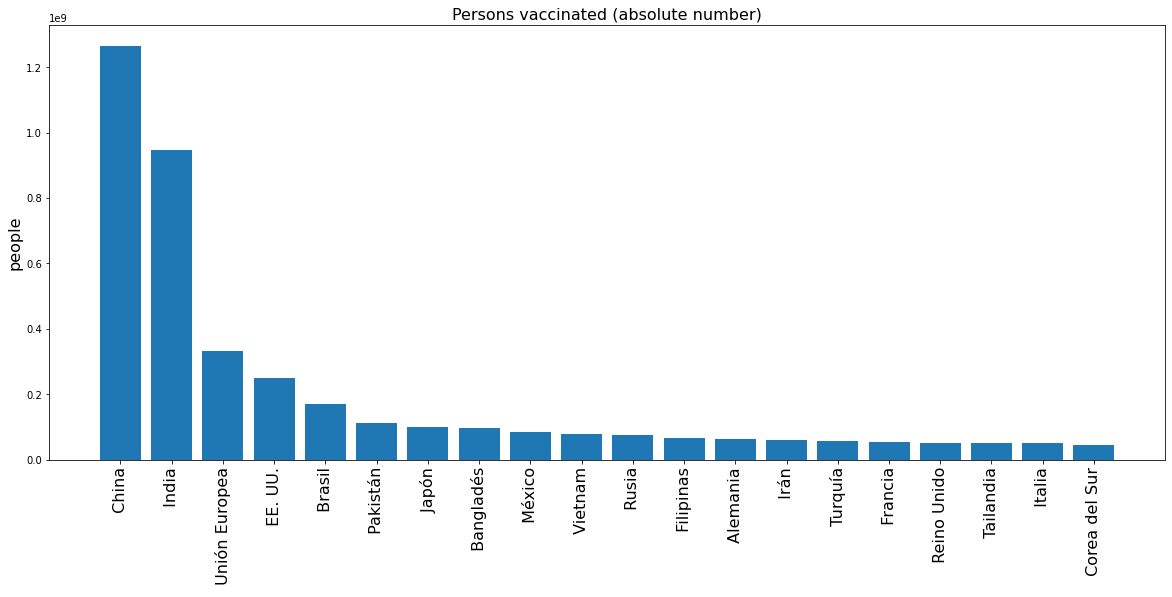

In [10]:
df_world_plot = df_world_sorted.head(20)

plt.figure(figsize=(20,8))

plt.title('Persons vaccinated (absolute number)', fontsize=16)

plt.bar(df_world_plot.index.values, 
        df_world_plot['Vaccinated population'].values)

plt.xticks(df_world_plot.index.values, 
           df_world_plot['Country'].values, 
           rotation=90,fontsize=16)

plt.ylabel('people',fontsize=16)
plt.show()

- Which country has vaccinated the highest percentage of its population? And the least?
- Which country has vaccinated the largest number of people? And the least?

In [11]:
print(
    'The country that has vaccinated the highest percentage of the population has been: ',
      df_world[df_world['Population %'] == 
               df_world['Population %'].max()]['Country'].values[0]
      )

print('The country that has vaccinated the lowest percentage of the population has been: ',
      df_world[df_world['Population %'] == 
               df_world['Population %'].min()]['Country'].values[0]
      )

print('\nThe country that has vaccinated the largest number of people has been: ',
      df_world[df_world['Vaccinated population'] == 
               df_world['Vaccinated population'].max()]['Country'].values[0]
      )

print('The country that has vaccinated the least number of people has been: ',
      df_world[df_world['Vaccinated population'] == 
               df_world['Vaccinated population'].min()]['Country'].values[0]
      )

The country that has vaccinated the highest percentage of the population has been:   Gibraltar
The country that has vaccinated the lowest percentage of the population has been:   Turkmenistán

The country that has vaccinated the largest number of people has been:   China
The country that has vaccinated the least number of people has been:  Montserrat Montserrat
